In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# Connect to the SQLite database
db_path = 'datasets/vacinacao_covid_df.db'
conn = sqlite3.connect(db_path)

# Distribuição de Idades dos Pacientes

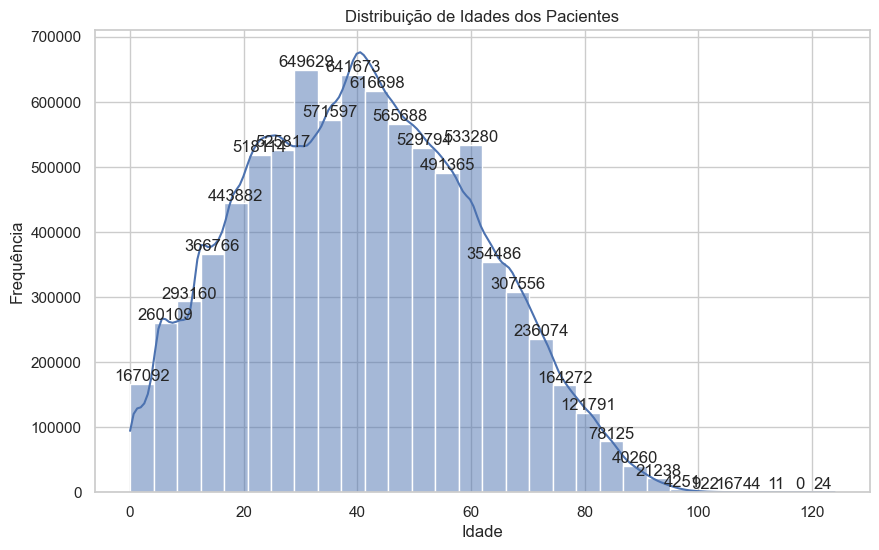

In [2]:
# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")

query = """
SELECT paciente_idade FROM vacinacao_covid_df
"""

df = pd.read_sql_query(query, conn)
df = df[~df.isin(['Pendente Identificação']).any(axis=1)]
df = df[~df.isin(['SEM INFORMACAO']).any(axis=1)]

# Plotar a distribuição de idades dos pacientes
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['paciente_idade'], bins=30, kde=True)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribuição de Idades dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.savefig('plots/distribuicao_idades_pacientes.png', bbox_inches='tight') 
plt.show()
del df
del query

# Distribuição das Vacinas por Fabricante

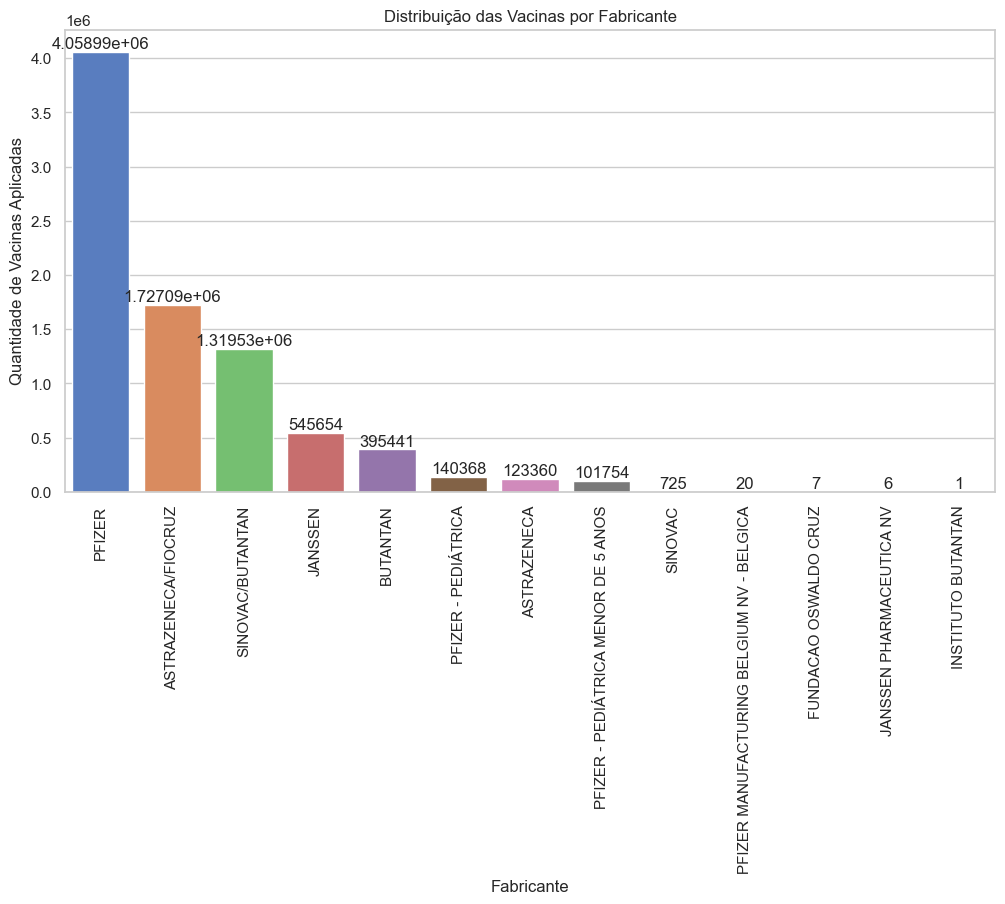

In [3]:
query = """
SELECT vacina_fabricante_nome FROM vacinacao_covid_df
"""

df = pd.read_sql_query(query, conn)
df = df[~df.isin(['Pendente Identificação']).any(axis=1)]
df = df[~df.isin(['SEM INFORMACAO']).any(axis=1)]

# Contagem das vacinas por fabricante
vacina_fabricante_counts = df['vacina_fabricante_nome'].value_counts()

# Plotar a distribuição das vacinas por fabricante
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=vacina_fabricante_counts.index, y=vacina_fabricante_counts.values, palette="muted")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribuição das Vacinas por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Quantidade de Vacinas Aplicadas')
plt.xticks(rotation=90)
plt.savefig('plots/distribuicao_vacinas_fabricante.png', bbox_inches='tight') 
plt.show()
del df
del query

# Quantidade de Doses Aplicadas ao Longo do Tempo

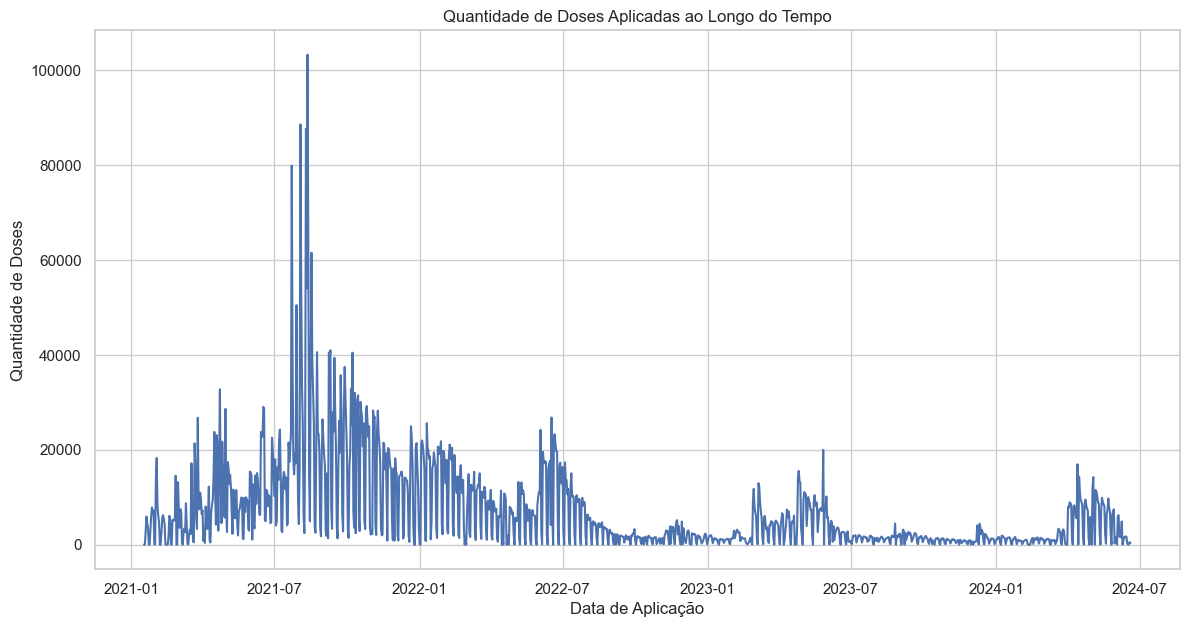

In [4]:
query = """
SELECT vacina_dataAplicacao FROM vacinacao_covid_df
"""

df = pd.read_sql_query(query, conn)
df = df[~df.isin(['Pendente Identificação']).any(axis=1)]
df = df[~df.isin(['SEM INFORMACAO']).any(axis=1)]

# Converter a coluna 'vacina_dataAplicacao' para datetime
df['vacina_dataAplicacao'] = pd.to_datetime(df['vacina_dataAplicacao'])

# Agrupar por data e contar a quantidade de doses aplicadas por dia
doses_por_dia = df.groupby('vacina_dataAplicacao').size()

# Plotar a quantidade de doses aplicadas ao longo do tempo
plt.figure(figsize=(14, 7))
ax = sns.lineplot(x=doses_por_dia.index, y=doses_por_dia.values)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Quantidade de Doses Aplicadas ao Longo do Tempo')
plt.xlabel('Data de Aplicação')
plt.ylabel('Quantidade de Doses')
plt.savefig('plots/quantidade_doses_aplicadas_longo_tempo.png', bbox_inches='tight') 
plt.show()
del df
del query

# Vacinação entre Diferentes Grupos Etários

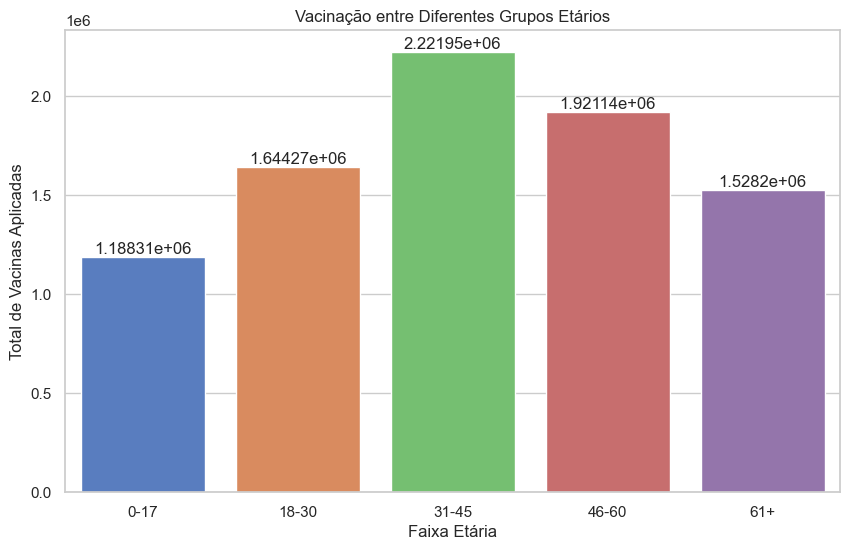

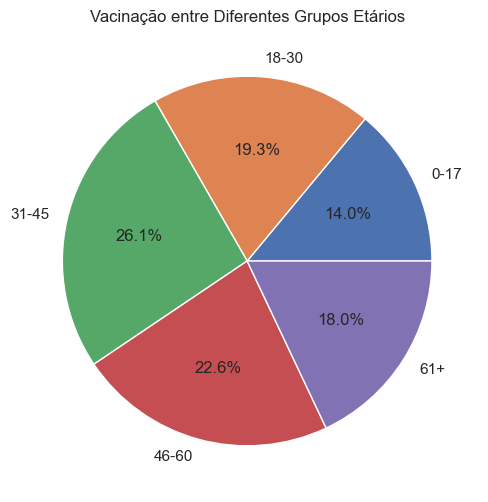

In [5]:
# Comparar vacinação entre diferentes grupos etários
query = """
SELECT CASE
         WHEN paciente_idade < 18 THEN '0-17'
         WHEN paciente_idade BETWEEN 18 AND 30 THEN '18-30'
         WHEN paciente_idade BETWEEN 31 AND 45 THEN '31-45'
         WHEN paciente_idade BETWEEN 46 AND 60 THEN '46-60'
         ELSE '61+'
       END AS faixa_etaria,
       COUNT(*) AS total_vacinas
FROM vacinacao_covid_df
GROUP BY faixa_etaria;
"""
df = pd.read_sql_query(query, conn)
df = df[~df.isin(['Pendente Identificação']).any(axis=1)]
df = df[~df.isin(['SEM INFORMACAO']).any(axis=1)]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='faixa_etaria', y='total_vacinas', data=df, palette="muted")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Vacinação entre Diferentes Grupos Etários')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Vacinas Aplicadas')
plt.savefig('plots/vacinacao_grupos_etarios_bar.png', bbox_inches='tight') 
plt.show()

plt.figure(figsize=(10, 6))
plt.pie(df['total_vacinas'], labels=df['faixa_etaria'], autopct='%1.1f%%')
plt.title('Vacinação entre Diferentes Grupos Etários')
plt.savefig('plots/vacinacao_grupos_etarios_pie.png', bbox_inches='tight') 
plt.show()

del df
del query

# Distribuição de Doses Aplicadas

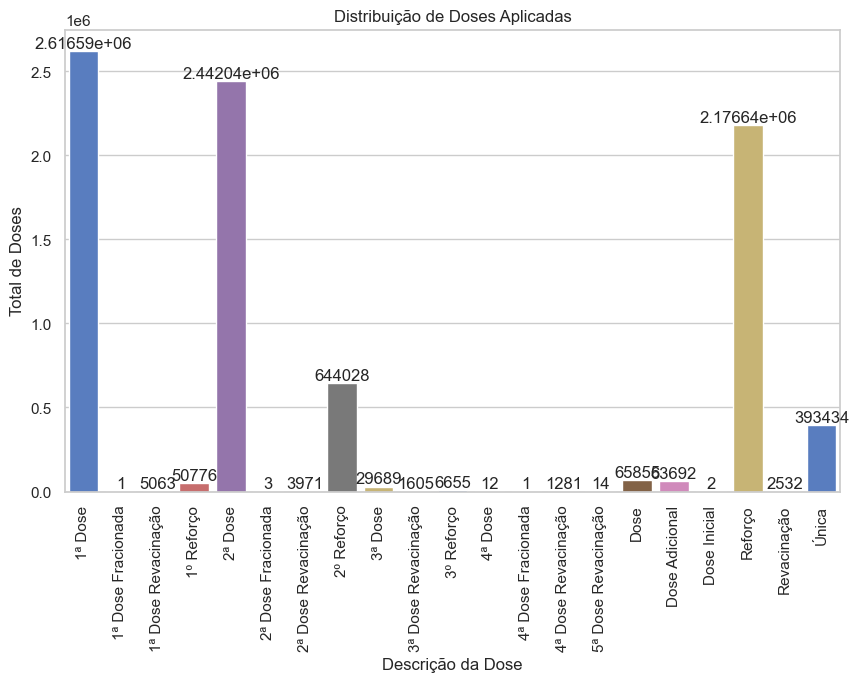

In [6]:
# Distribuição de Doses Aplicadas
query = """
SELECT vacina_descricao_dose,
       COUNT(*) AS total_doses
FROM vacinacao_covid_df
GROUP BY vacina_descricao_dose;
"""
df = pd.read_sql_query(query, conn)
df = df[~df.isin(['Pendente Identificação']).any(axis=1)]
df = df[~df.isin(['SEM INFORMACAO']).any(axis=1)]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='vacina_descricao_dose', y='total_doses', data=df, palette="muted")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribuição de Doses Aplicadas')
plt.xlabel('Descrição da Dose')
plt.xticks(rotation=90)
plt.ylabel('Total de Doses')
plt.savefig('plots/distribuicao_doses_aplicadas_bar.png', bbox_inches='tight') 
plt.show()

del df
del query

# Distribuição de Fabricantes por Faixa Etária

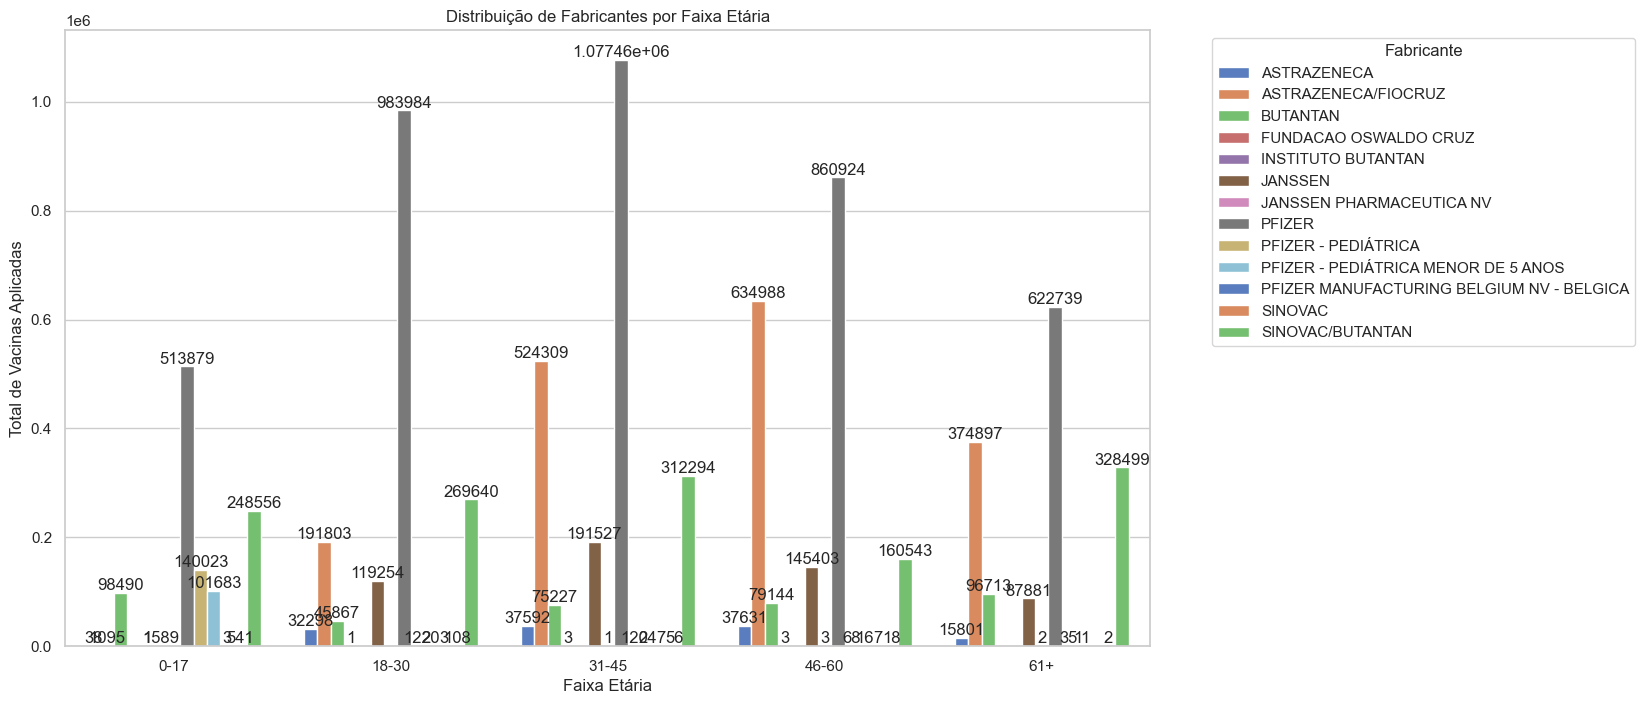

In [7]:
# Query para Distribuição de Fabricantes por Faixa Etária
query = """
SELECT vacina_fabricante_nome,
       CASE
         WHEN paciente_idade < 18 THEN '0-17'
         WHEN paciente_idade BETWEEN 18 AND 30 THEN '18-30'
         WHEN paciente_idade BETWEEN 31 AND 45 THEN '31-45'
         WHEN paciente_idade BETWEEN 46 AND 60 THEN '46-60'
         ELSE '61+'
       END AS faixa_etaria,
       COUNT(*) AS total_vacinas
FROM vacinacao_covid_df
GROUP BY vacina_fabricante_nome, faixa_etaria
ORDER BY vacina_fabricante_nome, faixa_etaria;
"""
df = pd.read_sql_query(query, conn)
df = df[~df.isin(['Pendente Identificação']).any(axis=1)]
df = df[~df.isin(['SEM INFORMACAO']).any(axis=1)]

# Plotar gráfico de Distribuição de Fabricantes por Faixa Etária
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='faixa_etaria', y='total_vacinas', hue='vacina_fabricante_nome', data=df, palette="muted")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribuição de Fabricantes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Vacinas Aplicadas')
plt.legend(title='Fabricante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('plots/distribuicao_fabricantes_por_faixa_etaria.png', bbox_inches='tight') 
plt.show()

del df
del query